<a href="https://colab.research.google.com/github/miamarcelino/breast_cancer/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breast Cancer Exploratory Data Analysis**

**Introduction**
This notebook performs exploratory data analysis on the breast cancer dataset to understand the characteristics of benign and malignant tumors.
The main objectives are:
1. Understand the morphologic characteristics of benign and malignant tumors
2. Address class imbalance for machine learning
3. Explore potential subclusters within benign and malignant groups
4. Prepare data for classification modeling

In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")
print("All imported")
# added just to create diff for PR

All imported


In [9]:
# 2. Load data
url = 'https://raw.githubusercontent.com/miamarcelino/breast_cancer/main/data/Breast_cancer_dataset.csv'
df = pd.read_csv(url)
print(f"Dataset shape: {df.shape}")
print("\nFirst rows:")
df.head()

Dataset shape: (569, 33)

First rows:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# 3. Check dataset structure
print(f"Dataset info: \n")
df.info()

Dataset info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_

In [ ]:
# 4. Clean data
# A. Remove empty columns
df = df.dropna(axis=1, how='all')

# B. Remove unnamed columns
unnamed_cols = [col for col in df.columns if 'Unnamed' in str(col)]
if unnamed_cols:
    df = df.drop(columns=unnamed_cols)

print("Cleaned dataset shape:", df.shape)

Cleaned dataset shape: (569, 32)


In [ ]:
# 5. Check target variable - diagnosis
print("Diagnosis counts:")
dx_counts = df['diagnosis'].value_counts()
print(dx_counts)

print("\nPercentages:")
dx_percent = df['diagnosis'].value_counts(normalize=True) * 100
print(dx_percent)

#Calculate imbalance ratio
benign = (df['diagnosis'] == 'B').sum()
malignant = (df['diagnosis'] == 'M').sum()
imbalance = benign/malignant
print(f"\nImbalance ratio = {imbalance:.2f}:1")

Diagnosis counts:
diagnosis
B    357
M    212
Name: count, dtype: int64

Percentages:
diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64

Imbalance ratio = 1.68:1


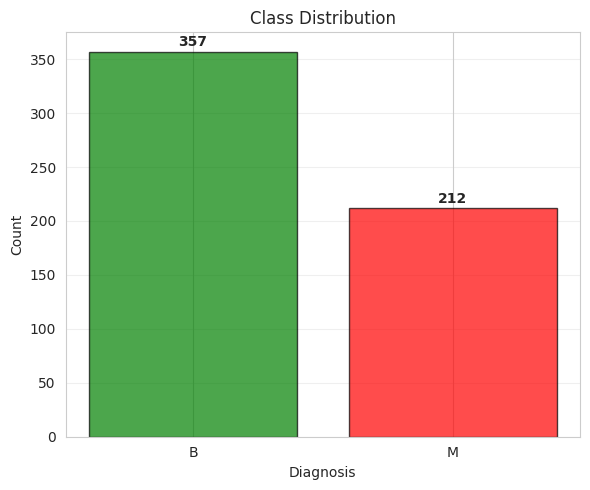

In [ ]:
# 6. Imbalance - visualization
fig, ax = plt.subplots(figsize=(6, 5))

diagnosis_counts = df['diagnosis'].value_counts()
ax.bar(diagnosis_counts.index, diagnosis_counts.values,
       color=['green', 'red'], alpha=0.7, edgecolor='black')
ax.set_title('Class Distribution')
ax.set_xlabel('Diagnosis')
ax.set_ylabel('Count')
ax.grid(axis='y', alpha=0.3)

for i, v in enumerate(diagnosis_counts.values):
    ax.text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# 7. Group by feature types (mean, se, worst)
mean_features = [col for col in df.columns if '_mean' in col]
se_features = [col for col in df.columns if '_se' in col]
worst_features = [col for col in df.columns if '_worst' in col]

print(f"Number of means: {len(mean_features)}")
print(mean_features)
print(f"\nNumber of SEs: {len(se_features)}")
print(se_features)
print(f"\nNumber of worsts: {len(worst_features)}")
print(worst_features)

Number of means: 10
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

Number of SEs: 10
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']

Number of worsts: 10
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [ ]:
# 8. Summary statistics by group
print('Summary stats:')
print("\nBenign cases:")
print(df[df['diagnosis'] == 'B'][mean_features].describe())
print("\nMalignant cases:")
print(df[df['diagnosis'] == 'M'][mean_features].describe())

Summary stats:

Benign cases:
       radius_mean  texture_mean  perimeter_mean   area_mean  smoothness_mean  \
count   357.000000    357.000000      357.000000  357.000000       357.000000   
mean     12.146524     17.914762       78.075406  462.790196         0.092478   
std       1.780512      3.995125       11.807438  134.287118         0.013446   
min       6.981000      9.710000       43.790000  143.500000         0.052630   
25%      11.080000     15.150000       70.870000  378.200000         0.083060   
50%      12.200000     17.390000       78.180000  458.400000         0.090760   
75%      13.370000     19.760000       86.100000  551.100000         0.100700   
max      17.850000     33.810000      114.600000  992.100000         0.163400   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
count        357.000000      357.000000           357.000000     357.000000   
mean           0.080085        0.046058             0.025717       0.174186   
std

In [ ]:
# 9. Check data quality
print("Missing values:")
print(df.isnull().sum().sum())
print("\nDuplicate rows:")
print(df.duplicated().sum())

Missing values:
0

Duplicate rows:
0


In [ ]:
# 10. t-Test
print("Feature // p-value // significant")
for feature in mean_features:
    benign = df[df['diagnosis'] == 'B'][feature]
    malignant = df[df['diagnosis'] == 'M'][feature]

    t_stat, p_value = stats.ttest_ind(benign, malignant)
    sig = "Yes" if p_value < 0.05 else "No"

    print(f"{feature:25} {p_value:.6f}     {sig}")

Feature // p-value // significant
radius_mean               0.000000     Yes
texture_mean              0.000000     Yes
perimeter_mean            0.000000     Yes
area_mean                 0.000000     Yes
smoothness_mean           0.000000     Yes
compactness_mean          0.000000     Yes
concavity_mean            0.000000     Yes
concave points_mean       0.000000     Yes
symmetry_mean             0.000000     Yes
fractal_dimension_mean    0.759937     No


In [ ]:
# 11. Correlations
corr_matrix = df[mean_features].corr()

print("High correlations (r > 0.9):")

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            print(f"{corr_matrix.columns[i]:25} {corr_matrix.columns[j]:25} {corr_matrix.iloc[i, j]:8.4f}")

High correlations (r > 0.9):
radius_mean               perimeter_mean              0.9979
radius_mean               area_mean                   0.9874
perimeter_mean            area_mean                   0.9865
concavity_mean            concave points_mean         0.9214


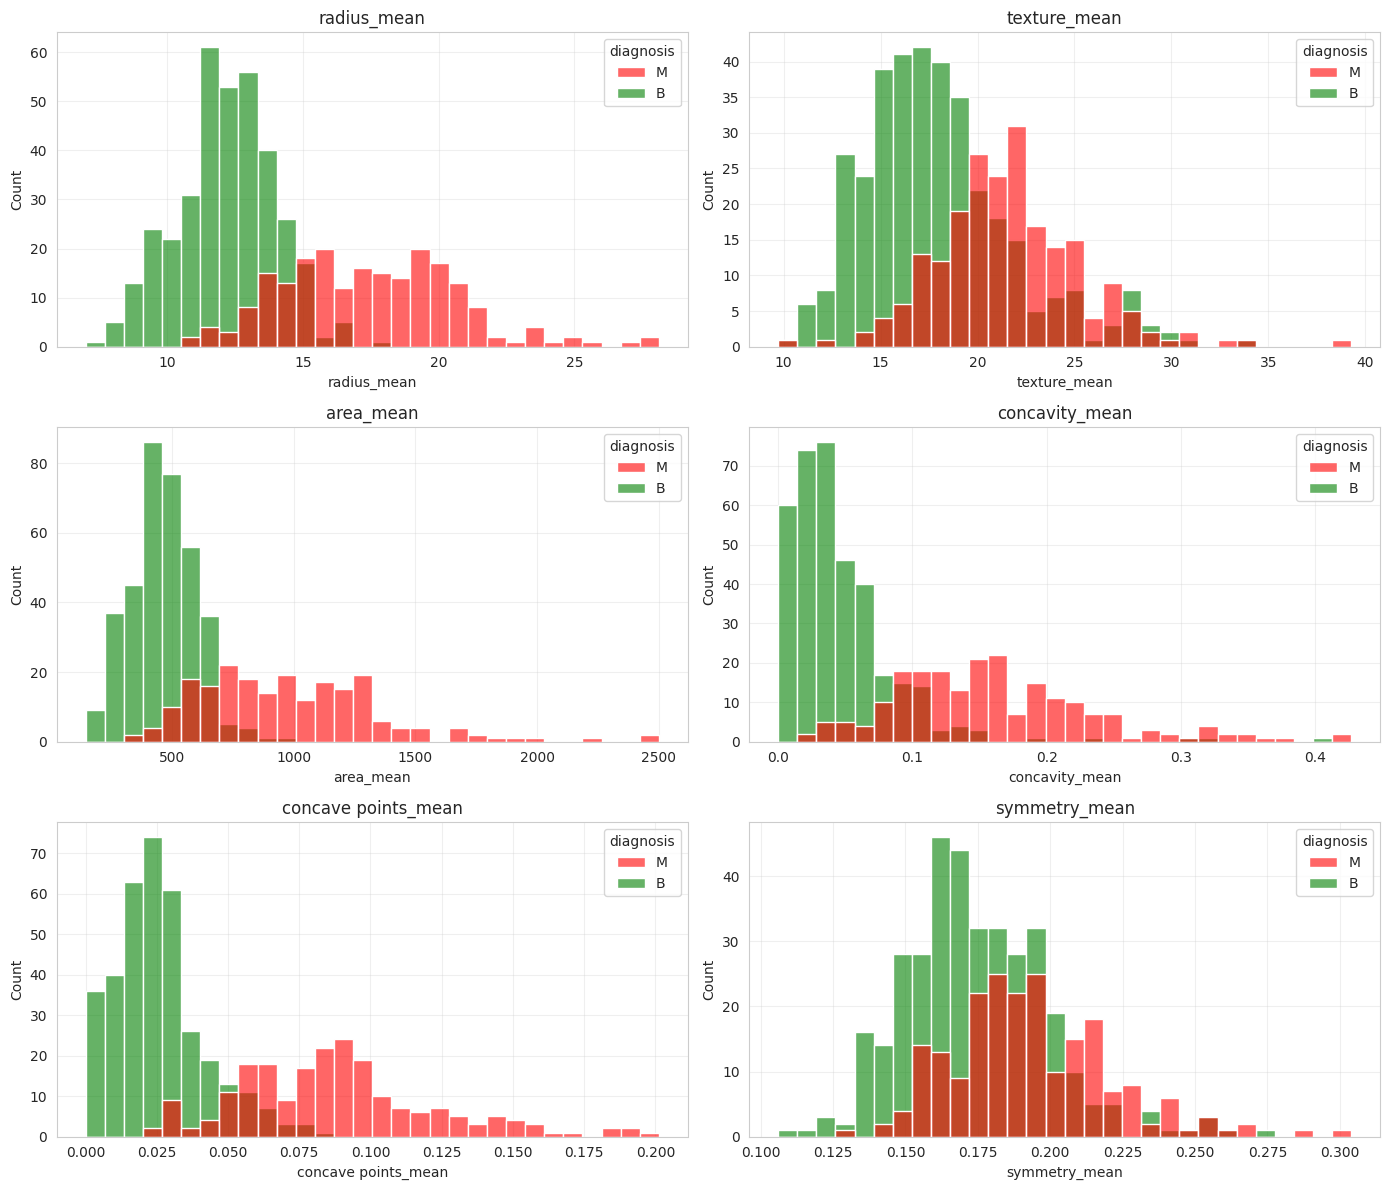

In [ ]:
# 12. Distribution plots (Seaborn)
key_features = ['radius_mean', 'texture_mean', 'area_mean',
                'concavity_mean', 'concave points_mean', 'symmetry_mean']

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    sns.histplot(data=df, x=feature, hue='diagnosis',
                 bins=30, ax=axes[idx],
                 palette={'B': 'green', 'M': 'red'}, alpha=0.6)
    axes[idx].set_title(feature)
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

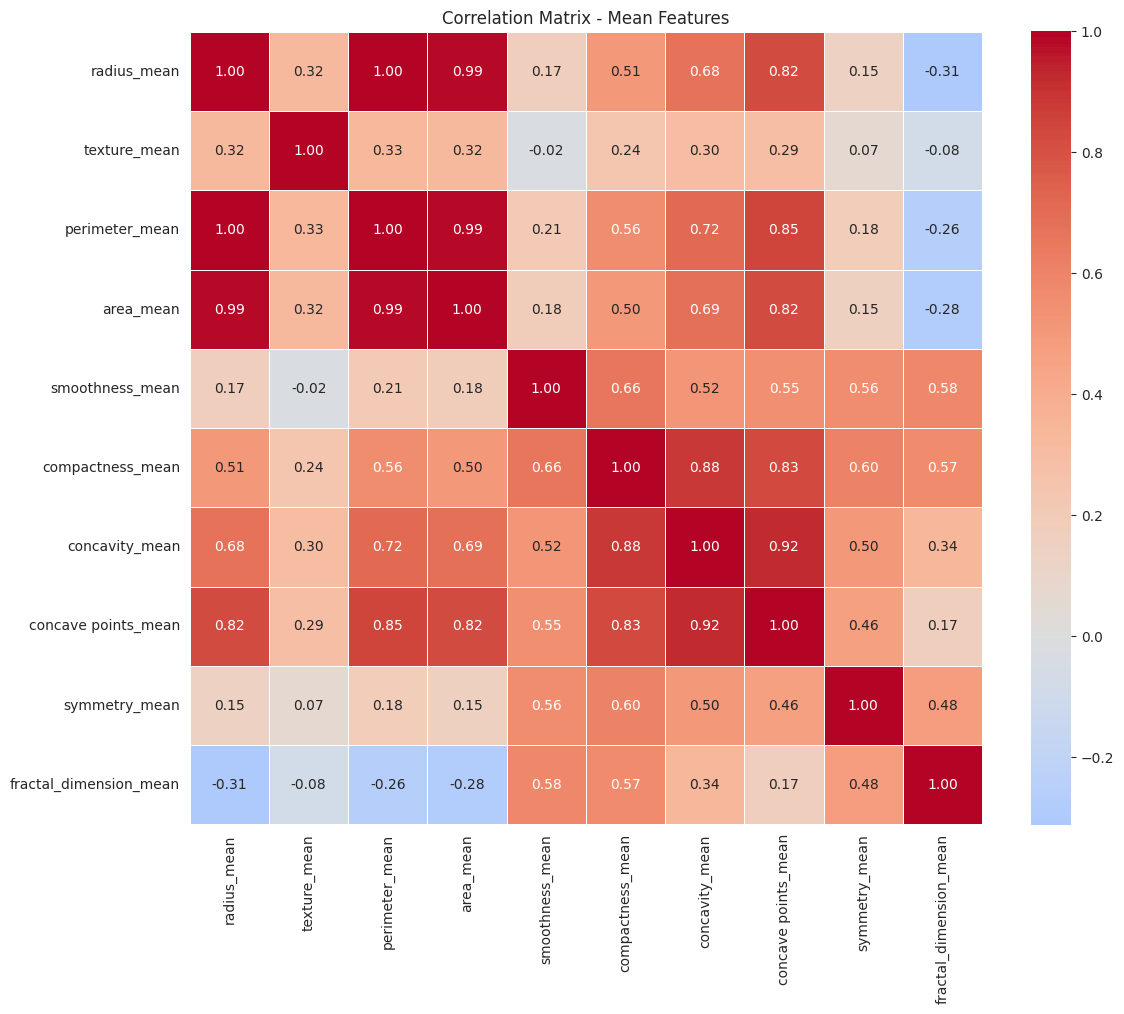

In [ ]:
# 13. Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[mean_features].corr(), annot=True, fmt='.2f',
            cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix - Mean Features')
plt.tight_layout()
plt.show()

Total benign cases: 357


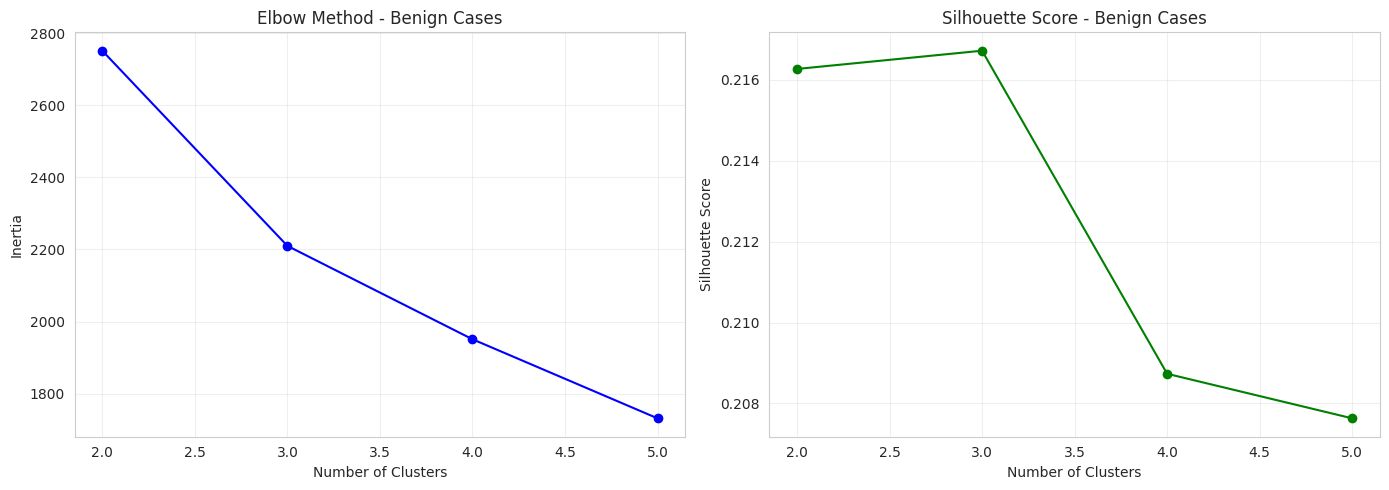


Based on elbow method and silhouette score, optimal clusters for benign cases:
Suggested k = 3

Benign clusters distribution:
cluster
0    134
1    157
2     66
Name: count, dtype: int64

Cluster characteristics:

Benign Cluster 0:
  Size: 134 cases
  Mean radius: 10.60
  Mean area: 347.86
  Mean texture: 17.96
  Mean concave points: 0.0162

Benign Cluster 1:
  Size: 157 cases
  Mean radius: 13.44
  Mean area: 560.70
  Mean texture: 18.22
  Mean concave points: 0.0250

Benign Cluster 2:
  Size: 66 cases
  Mean radius: 12.22
  Mean area: 463.22
  Mean texture: 17.10
  Mean concave points: 0.0467


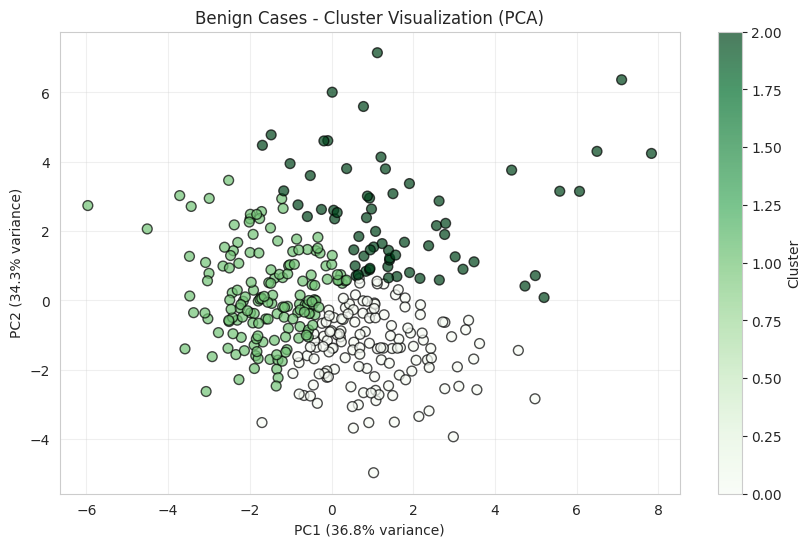


Interpretation:
Benign cases can be subdivided into subclusters based on:
- Size characteristics (radius, area)
- Texture and irregularity features
- This could represent different grades of benign tumors


In [ ]:
# 14. Subclusters - benign cases
df_benign = df[df['diagnosis'] == 'B'].copy()
print(f"Total benign cases: {len(df_benign)}")

X_benign = df_benign[mean_features].copy()
scaler = StandardScaler()
X_benign_scaled = scaler.fit_transform(X_benign)
inertias = []
silhouette_scores = []
K_range = range(2, 6)

from sklearn.metrics import silhouette_score

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_benign_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_benign_scaled, kmeans.labels_))

# Plot elbow curve
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method - Benign Cases')
axes[0].grid(alpha=0.3)

axes[1].plot(K_range, silhouette_scores, 'go-')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score - Benign Cases')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nBased on elbow method and silhouette score, optimal clusters for benign cases:")
best_k_benign = K_range[np.argmax(silhouette_scores)]
print(f"Suggested k = {best_k_benign}\n")

k_benign = 3
kmeans_benign = KMeans(n_clusters=k_benign, random_state=42, n_init=10)
df_benign['cluster'] = kmeans_benign.fit_predict(X_benign_scaled)

print(f"Benign clusters distribution:")
print(df_benign['cluster'].value_counts().sort_index())
print("\nCluster characteristics:")
for cluster_id in range(k_benign):
    print(f"\nBenign Cluster {cluster_id}:")
    cluster_data = df_benign[df_benign['cluster'] == cluster_id]
    print(f"  Size: {len(cluster_data)} cases")
    print(f"  Mean radius: {cluster_data['radius_mean'].mean():.2f}")
    print(f"  Mean area: {cluster_data['area_mean'].mean():.2f}")
    print(f"  Mean texture: {cluster_data['texture_mean'].mean():.2f}")
    print(f"  Mean concave points: {cluster_data['concave points_mean'].mean():.4f}")

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_benign_pca = pca.fit_transform(X_benign_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_benign_pca[:, 0], X_benign_pca[:, 1],
                     c=df_benign['cluster'], cmap='Greens',
                     edgecolor='black', alpha=0.7, s=50)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.title('Benign Cases - Cluster Visualization (PCA)')
plt.colorbar(scatter, label='Cluster')
plt.grid(alpha=0.3)
plt.show()

print("\nInterpretation:")
print("Benign cases can be subdivided into subclusters based on:")
print("- Size characteristics (radius, area)")
print("- Texture and irregularity features")
print("- This could represent different grades of benign tumors")

Total malignant cases: 212


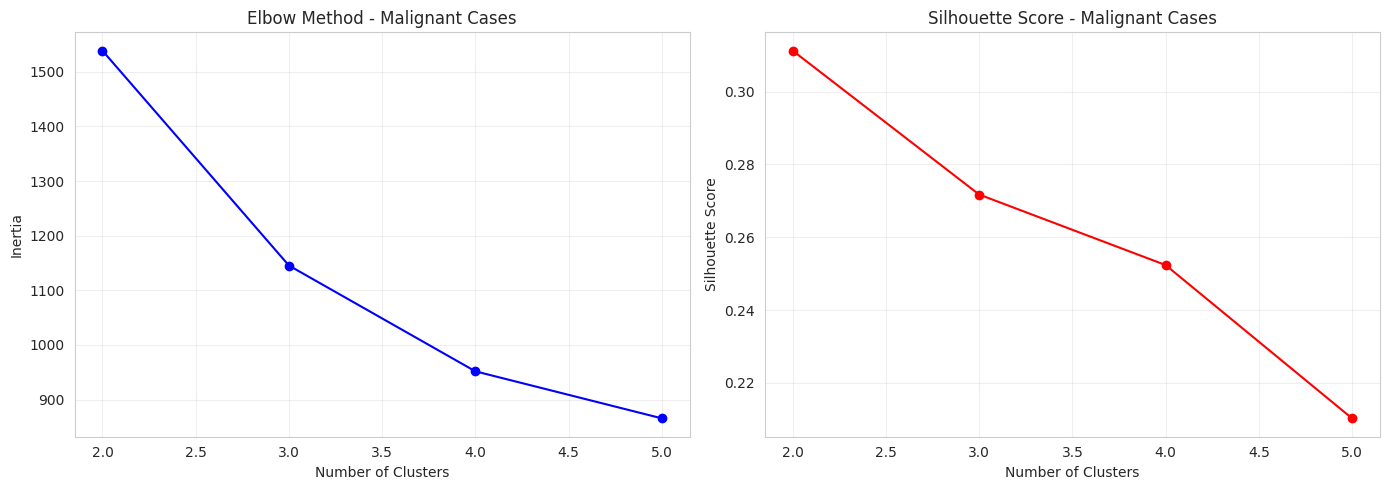


Suggested k for malignant cases = 3

Malignant clusters distribution:
cluster
0     62
1     40
2    110
Name: count, dtype: int64

Cluster characteristics:

Malignant Cluster 0:
  Size: 62 cases
  Mean radius: 14.75
  Mean area: 682.63
  Mean texture: 21.08
  Mean concave points: 0.0866
  Mean concavity: 0.1753

Malignant Cluster 1:
  Size: 40 cases
  Mean radius: 21.45
  Mean area: 1439.97
  Mean texture: 22.42
  Mean concave points: 0.1401
  Mean concavity: 0.2642

Malignant Cluster 2:
  Size: 110 cases
  Mean radius: 17.54
  Mean area: 977.22
  Mean texture: 21.60
  Mean concave points: 0.0698
  Mean concavity: 0.1150


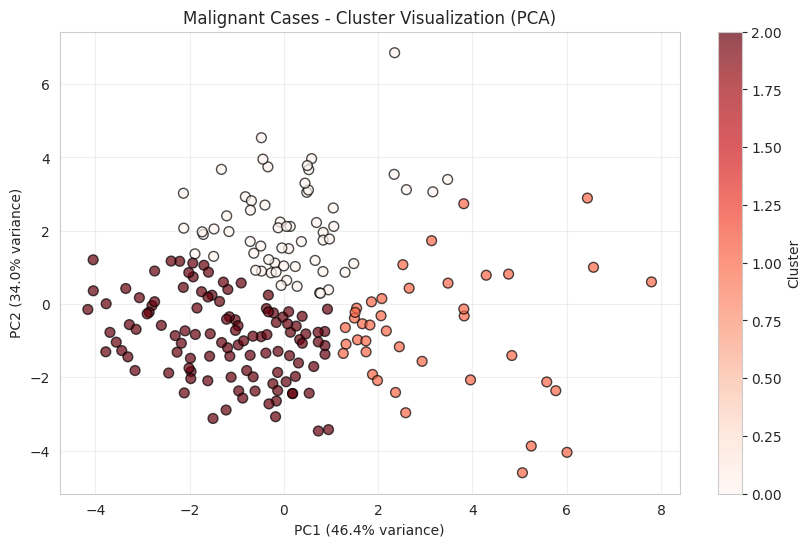


Interpretation:
Malignant cases show distinct subclusters potentially representing:
- Different levels of aggressiveness
- Variations in tumor size and irregularity
- Could correspond to different malignancy grades


In [ ]:
# 15. Subclusters - malignant cases
df_malignant = df[df['diagnosis'] == 'M'].copy()
print(f"Total malignant cases: {len(df_malignant)}")
X_malignant = df_malignant[mean_features].copy()

scaler_m = StandardScaler()
X_malignant_scaled = scaler_m.fit_transform(X_malignant)

inertias_m = []
silhouette_scores_m = []
K_range = range(2, 6)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_malignant_scaled)
    inertias_m.append(kmeans.inertia_)
    silhouette_scores_m.append(silhouette_score(X_malignant_scaled, kmeans.labels_))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertias_m, 'bo-')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method - Malignant Cases')
axes[0].grid(alpha=0.3)

axes[1].plot(K_range, silhouette_scores_m, 'ro-')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score - Malignant Cases')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

best_k_malignant = K_range[np.argmax(silhouette_scores_m)]
print(f"\nSuggested k for malignant cases = 3\n")

k_malignant = 3
kmeans_malignant = KMeans(n_clusters=k_malignant, random_state=42, n_init=10)
df_malignant['cluster'] = kmeans_malignant.fit_predict(X_malignant_scaled)

print(f"Malignant clusters distribution:")
print(df_malignant['cluster'].value_counts().sort_index())

print("\nCluster characteristics:")
for cluster_id in range(k_malignant):
    print(f"\nMalignant Cluster {cluster_id}:")
    cluster_data = df_malignant[df_malignant['cluster'] == cluster_id]
    print(f"  Size: {len(cluster_data)} cases")
    print(f"  Mean radius: {cluster_data['radius_mean'].mean():.2f}")
    print(f"  Mean area: {cluster_data['area_mean'].mean():.2f}")
    print(f"  Mean texture: {cluster_data['texture_mean'].mean():.2f}")
    print(f"  Mean concave points: {cluster_data['concave points_mean'].mean():.4f}")
    print(f"  Mean concavity: {cluster_data['concavity_mean'].mean():.4f}")

pca_m = PCA(n_components=2)
X_malignant_pca = pca_m.fit_transform(X_malignant_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_malignant_pca[:, 0], X_malignant_pca[:, 1],
                     c=df_malignant['cluster'], cmap='Reds',
                     edgecolor='black', alpha=0.7, s=50)
plt.xlabel(f'PC1 ({pca_m.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca_m.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.title('Malignant Cases - Cluster Visualization (PCA)')
plt.colorbar(scatter, label='Cluster')
plt.grid(alpha=0.3)
plt.show()

print("\nInterpretation:")
print("Malignant cases show distinct subclusters potentially representing:")
print("- Different levels of aggressiveness")
print("- Variations in tumor size and irregularity")
print("- Could correspond to different malignancy grades")

In [ ]:
# 16. Compare clusters
# Compare all clusters across both diagnoses
print("\nBENIGN CLUSTERS:")
for i in range(k_benign):
    cluster_data = df_benign[df_benign['cluster'] == i]
    print(f"\nBenign-{i} (n={len(cluster_data)}):")
    print(f"  Radius: {cluster_data['radius_mean'].mean():.2f}")
    print(f"  Concave points: {cluster_data['concave points_mean'].mean():.4f}")
    print(f"  Texture: {cluster_data['texture_mean'].mean():.2f}")
print("\nMALIGNANT CLUSTERS:")
for i in range(k_malignant):
    cluster_data = df_malignant[df_malignant['cluster'] == i]
    print(f"\nMalignant-{i} (n={len(cluster_data)}):")
    print(f"  Radius: {cluster_data['radius_mean'].mean():.2f}")
    print(f"  Concave points: {cluster_data['concave points_mean'].mean():.4f}")
    print(f"  Texture: {cluster_data['texture_mean'].mean():.2f}")


BENIGN CLUSTERS:

Benign-0 (n=134):
  Radius: 10.60
  Concave points: 0.0162
  Texture: 17.96

Benign-1 (n=157):
  Radius: 13.44
  Concave points: 0.0250
  Texture: 18.22

Benign-2 (n=66):
  Radius: 12.22
  Concave points: 0.0467
  Texture: 17.10

MALIGNANT CLUSTERS:

Malignant-0 (n=62):
  Radius: 14.75
  Concave points: 0.0866
  Texture: 21.08

Malignant-1 (n=40):
  Radius: 21.45
  Concave points: 0.1401
  Texture: 22.42

Malignant-2 (n=110):
  Radius: 17.54
  Concave points: 0.0698
  Texture: 21.60


In [ ]:
# 17. Addressing class imbalance
print("\nCurrent class distribution:")
print(f"  Benign: {len(df_benign)} ({len(df_benign)/len(df)*100:.1f}%)")
print(f"  Malignant: {len(df_malignant)} ({len(df_malignant)/len(df)*100:.1f}%)")

print("\nStrategies to test:")
print("\n1. Resampling techniques:")
print("   - Random Oversampling (duplicate minority class)")
print("   - SMOTE (Synthetic Minority Oversampling)")
print("   - Random Undersampling (reduce majority class)")
print("   - Combination approaches")

print("\n2. Algorithm-level solutions:")
print("   - Class weights in models")
print("   - Balanced Random Forest")
print("   - Cost-sensitive learning")

print("\n3. Evaluation approach:")
print("   - Use stratified k-fold cross-validation")
print("   - Focus on recall for malignant class")
print("   - Monitor F1-score and ROC-AUC")


Current class distribution:
  Benign: 357 (62.7%)
  Malignant: 212 (37.3%)

Strategies to test:

1. Resampling techniques:
   - Random Oversampling (duplicate minority class)
   - SMOTE (Synthetic Minority Oversampling)
   - Random Undersampling (reduce majority class)
   - Combination approaches

2. Algorithm-level solutions:
   - Class weights in models
   - Balanced Random Forest
   - Cost-sensitive learning

3. Evaluation approach:
   - Use stratified k-fold cross-validation
   - Focus on recall for malignant class
   - Monitor F1-score and ROC-AUC


In [ ]:
# 18. Prepare data for modeling
# A. Prepare features and target
X = df[mean_features].copy()
y = df['diagnosis'].map({'B': 0, 'M': 1})

print("Features prepared:")
print(f"  X shape: {X.shape}")
print(f"  y shape: {y.shape}")
print(f"\nTarget distribution:")
print(y.value_counts())

print("\nData ready for:")
print("- Train/test split (stratified)")
print("- Resampling experiments")
print("- Model training with different algorithms")

Features prepared:
  X shape: (569, 10)
  y shape: (569,)

Target distribution:
diagnosis
0    357
1    212
Name: count, dtype: int64

Data ready for:
- Train/test split (stratified)
- Resampling experiments
- Model training with different algorithms


In [ ]:
print("\n1. CLASS IMBALANCE:")
print(f"   - Ratio: {imbalance:.2f}:1 (benign:malignant)")
print("   - Will test: SMOTE, random oversampling, balanced random forest")
print("   - Must use stratified splits and appropriate metrics")

print("\n2. FEATURE INSIGHTS:")
print("   - All features show significant differences (p < 0.05)")
print("   - High correlation between radius, perimeter, area")
print("   - Most discriminative: concave points, area, radius")

print("\n3. CLUSTERING FINDINGS:")
print(f"   - Benign cases: {k_benign} meaningful subclusters identified")
print(f"   - Malignant cases: {k_malignant} meaningful subclusters identified")
print("   - Clusters represent different severity levels within each diagnosis")
print("   - Could be useful for risk stratification")

print("\n4. DATA QUALITY:")
print("   - No missing values")
print("   - No duplicates")
print("   - Some outliers present (acceptable)")

print("\n5. MODELING APPROACH:")
print("   - Test multiple algorithms: Logistic Regression, Random Forest")
print("   - Compare class imbalance techniques")
print("   - Primary metric: Recall (minimize false negatives)")
print("   - Secondary metrics: F1-score, ROC-AUC")
print("   - Consider hierarchical model: benign/malignant then subclusters")

print("\n6. NO DIMENSIONALITY REDUCTION:")
print("   - Will use feature selection instead of PCA")
print("   - Remove highly correlated features")
print("   - Select based on importance scores from models")

print("\nNext phase: Model development and comparison")


1. CLASS IMBALANCE:
   - Ratio: 1.68:1 (benign:malignant)
   - Will test: SMOTE, random oversampling, balanced random forest
   - Must use stratified splits and appropriate metrics

2. FEATURE INSIGHTS:
   - All features show significant differences (p < 0.05)
   - High correlation between radius, perimeter, area
   - Most discriminative: concave points, area, radius

3. CLUSTERING FINDINGS:
   - Benign cases: 3 meaningful subclusters identified
   - Malignant cases: 3 meaningful subclusters identified
   - Clusters represent different severity levels within each diagnosis
   - Could be useful for risk stratification

4. DATA QUALITY:
   - No missing values
   - No duplicates
   - Some outliers present (acceptable)

5. MODELING APPROACH:
   - Test multiple algorithms: Logistic Regression, Random Forest, XGBoost
   - Compare class imbalance techniques
   - Primary metric: Recall (minimize false negatives)
   - Secondary metrics: F1-score, ROC-AUC
   - Consider hierarchical model: benig